In [1]:
import pandas as pd
import os


In [2]:
house_data = pd.read_csv(os.path.abspath('alonhadat-CLEAN2.csv'))
# house_data = pd.read_csv('/Users/nguyenbathiem/Documents/GitHub/StockBot/Real-Estate-Price-Prediction/house_price_eda/alonhadat/alonhadat-CLEAN2.csv')
house_data.head()

,description,area,direction,dining_room,road_width,kitchen,house_type,land_use_rights,rooftop,width,storey,car_parking,length,bedroom,road,ward,district,price,X,Y
0,"Cần bán nhà Lê Trọng Tấn,Hà đông\n+Vị trí đẹp,...",40.0,NaN,NaN,7.0,NaN,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,NaN,NaN,4,NaN,NaN,3.0,lê trọng tấn,la khê,hà đông,5.95,20.967015,105.756479
1,Cần bán nhà phố Ao sen-Hà đông\n-Vị trí đắc đị...,40.0,NaN,NaN,11.0,NaN,Nhà mặt tiền,NaN,NaN,NaN,5,NaN,NaN,3.0,ao sen,mộ lao,hà đông,10.45,20.982356,105.787992
2,"Bán gấp nhà xóm chùa Xa la,Hà đông.Nhà gần việ...",40.0,NaN,NaN,5.0,NaN,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,NaN,NaN,4,NaN,NaN,4.0,xa la,kiến hưng,hà đông,4.90,20.960122,105.800079
3,"-Bán nhà khu Cổng đồng La khê,Hà đông.Vị trí đ...",50.0,NaN,NaN,11.0,NaN,"Biệt thự, nhà liền kề",Sổ hồng/ Sổ đỏ,NaN,NaN,6,NaN,NaN,4.0,tố hữu,la khê,hà đông,7.45,20.970769,105.755225
4,Cần bán gấp nhà mặt phố Phan Đình Phùng Hà đôn...,60.0,NaN,NaN,17.0,NaN,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,NaN,NaN,5,NaN,NaN,4.0,phan đình phùng,yết kiêu,hà đông,12.30,20.972974,105.776924


In [3]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94613 entries, 0 to 94612
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   description      94307 non-null  object 
 1   area             94603 non-null  float64
 2   direction        6895 non-null   object 
 3   dining_room      48190 non-null  object 
 4   road_width       93968 non-null  float64
 5   kitchen          48336 non-null  object 
 6   house_type       94613 non-null  object 
 7   land_use_rights  77382 non-null  object 
 8   rooftop          47554 non-null  object 
 9   width            66421 non-null  float64
 10  storey           94613 non-null  object 
 11  car_parking      39582 non-null  object 
 12  length           35249 non-null  float64
 13  bedroom          83950 non-null  float64
 14  road             91531 non-null  object 
 15  ward             94218 non-null  object 
 16  district         94613 non-null  object 
 17  price       

In [4]:
house_data.nunique()

description        90881
area                1014
direction              8
dining_room            1
road_width           171
kitchen                1
house_type             9
land_use_rights        4
rooftop                1
width                538
storey                49
car_parking            1
length               742
bedroom              116
road                1322
ward                 428
district              30
price               2475
X                   2295
Y                   2297
dtype: int64

In [5]:
for col in house_data.columns:
    # if col.endswith('_unit'):
    if col in ['area', 'direction', 'dining_room', 'road_width','kitchen','house_type','land_use_rights','rooftop', 'width','storey', 'car_parking', 'length','bedroom', 'road', 'ward','district',    ]:
        print(col, house_data[col].unique().tolist())

area [40.0, 50.0, 60.0, 31.0, 80.0, 45.0, 30.0, 42.0, 90.0, 32.0, 54.0, 4.52, 33.0, 70.0, 120.0, 1.0, 66.0, 200.0, 83.0, 38.0, 12.0, 28.0, 52.0, 210.0, 4.0, 35.0, 100.0, 95.0, 236.0, 36.0, 78.0, 1.6, 88.0, 202.0, 55.0, 99.0, 43.0, 72.0, 82.0, 62.0, 46.0, 51.0, 93.0, 81.0, 245.0, 237.0, 110.0, 325.0, 308.0, 68.0, 64.0, 37.0, 260.0, 26.0, 34.0, 25.0, 15.0, 47.0, 48.0, 41.0, 27.0, 23.0, 18.0, 69.0, 116.0, 73.0, 67.0, 74.0, 75.0, 250.0, 65.0, 53.0, 96.0, 166.0, 478.0, 6.0, 56.0, 44.0, 49.0, 776.0, 152.0, 105.0, 136.0, 893.0, 61.0, 140.0, 77.0, 119.0, 290.0, 76.0, 990.0, 57.0, 85.0, 460.0, 148.0, 256.0, 150.0, 160.0, 208.0, 108.0, 204.0, 379.0, 455.0, 312.0, 1.521, 103.0, 180.0, 626.0, 2.255, 155.0, 923.0, 410.0, 1.751, 225.0, 102.0, 122.0, 86.0, 58.0, 94.0, 520.0, 190.0, 39.0, 333.0, 240.0, 89.0, 63.0, 222.0, 131.0, 230.0, 175.0, 189.0, 92.0, 300.0, 2.0, 700.0, 24.0, 29.0, 377.0, 147.0, 123.0, 176.0, 16.5, 135.0, 114.0, 130.0, 79.0, 1.084, 33.054, 2.12, 59.0, 220.0, 217.0, 121.0, 500.0, 10

## MORE PROCESSING

### Process Storey

In [6]:
house_data['storey'].describe()

count     94613
unique       49
top           5
freq      29250
Name: storey, dtype: object

In [9]:
# house_data_copy = house_data.copy()
house_data.loc[house_data['storey'] == '---', 'storey'] = float('nan')
house_data['storey'] = house_data['storey'].astype(float)
# house_data_copy['storey'].describe() 
# house_data_copy['storey'].nunique()

### Drop nan Price

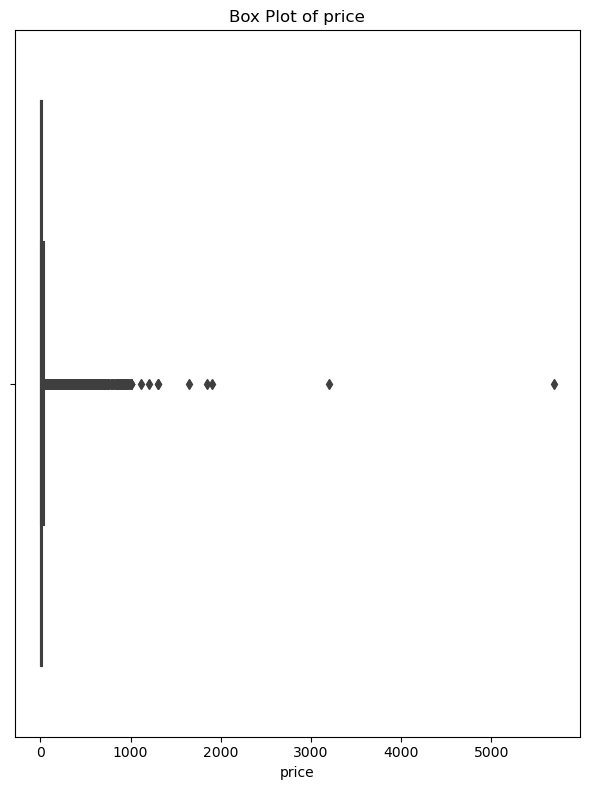

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'house_data' is your DataFrame
columns_to_plot = ['price']

# Convert columns to numeric
for col in columns_to_plot:
    house_data[col] = pd.to_numeric(house_data[col], errors='coerce')

# Check the number of columns to plot
num_columns = len(columns_to_plot)

# Plotting
# if num_columns == 1:
fig, ax = plt.subplots(figsize=(6, 8))  # Single subplot
sns.boxplot(data=house_data, x=columns_to_plot[0], ax=ax)
ax.set_title(f'Box Plot of {columns_to_plot[0]}')

plt.tight_layout()
plt.show()


In [21]:
house_data.loc[house_data['price'] == house_data['price'].max()]

,description,area,direction,dining_room,road_width,kitchen,house_type,land_use_rights,rooftop,width,storey,car_parking,length,bedroom,road,ward,district,price,X,Y
78517,HOTEL 5 SAO MẠ VÀNG 24K DUY NHẤT THỦ ĐÔ - LÔ G...,2.24,NaN,True,NaN,True,"Nhà hàng, khách sạn",Sổ hồng/ Sổ đỏ,True,100.0,29.0,True,NaN,342.0,giảng võ,giảng võ,ba đình,5700.0,21.026827,105.820602


In [22]:
house_data.dropna(subset=['price'], inplace=True)

In [24]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91969 entries, 0 to 94612
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   description      91683 non-null  object 
 1   area             91959 non-null  float64
 2   direction        6174 non-null   object 
 3   dining_room      47851 non-null  object 
 4   road_width       91390 non-null  float64
 5   kitchen          47976 non-null  object 
 6   house_type       91969 non-null  object 
 7   land_use_rights  75273 non-null  object 
 8   rooftop          47232 non-null  object 
 9   width            64367 non-null  float64
 10  storey           83806 non-null  float64
 11  car_parking      39208 non-null  object 
 12  length           33943 non-null  float64
 13  bedroom          83287 non-null  float64
 14  road             89689 non-null  object 
 15  ward             91578 non-null  object 
 16  district         91969 non-null  object 
 17  price       

In [25]:
house_data.describe()

,area,road_width,width,storey,length,bedroom,price,X,Y
count,91959.000000,91390.000000,64367.000000,83806.000000,33943.000000,83287.000000,91969.000000,91969.000000,91969.000000
mean,83.339047,9.729548,6.737494,4.922774,15.045489,5.520321,22.800876,21.012973,105.815605
std,86.116447,11.180674,22.154999,3.301435,54.793425,7.861098,58.012697,0.219202,0.383397
min,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,12.282267,-1.558819
25%,41.000000,3.000000,4.000000,4.000000,10.000000,3.000000,4.700000,20.996231,105.793312
50%,56.000000,5.000000,5.000000,5.000000,12.000000,4.000000,8.900000,21.016265,105.821366
75%,90.000000,12.000000,6.000000,5.000000,16.000000,6.000000,20.000000,21.038806,105.848381
max,998.000000,630.000000,4800.000000,700.000000,7000.000000,753.000000,5700.000000,47.216057,109.201845


In [42]:
house_data_copy = house_data.copy()
house_data_copy['address'] = (
    house_data_copy['road'].fillna('') +
    ", " +
    house_data_copy['ward'].fillna('') +
    ", " +
    house_data_copy['district'].fillna('') +
    ", hà nội"
)

In [43]:
house_data_copy['address'].head()

0         lê trọng tấn, la khê, hà đông, hà nội
1               ao sen, mộ lao, hà đông, hà nội
2             xa la, kiến hưng, hà đông, hà nội
3               tố hữu, la khê, hà đông, hà nội
4    phan đình phùng, yết kiêu, hà đông, hà nội
Name: address, dtype: object

In [44]:
house_data_copy.drop(['road', 'ward', 'district'], inplace=True, axis=1)

In [45]:
house_data_copy.head()

,description,area,direction,dining_room,road_width,kitchen,house_type,land_use_rights,rooftop,width,storey,car_parking,length,bedroom,price,X,Y,address
0,"Cần bán nhà Lê Trọng Tấn,Hà đông\n+Vị trí đẹp,...",40.0,NaN,NaN,7.0,NaN,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,NaN,NaN,4.0,NaN,NaN,3.0,5.95,20.967015,105.756479,"lê trọng tấn, la khê, hà đông, hà nội"
1,Cần bán nhà phố Ao sen-Hà đông\n-Vị trí đắc đị...,40.0,NaN,NaN,11.0,NaN,Nhà mặt tiền,NaN,NaN,NaN,5.0,NaN,NaN,3.0,10.45,20.982356,105.787992,"ao sen, mộ lao, hà đông, hà nội"
2,"Bán gấp nhà xóm chùa Xa la,Hà đông.Nhà gần việ...",40.0,NaN,NaN,5.0,NaN,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,NaN,NaN,4.0,NaN,NaN,4.0,4.90,20.960122,105.800079,"xa la, kiến hưng, hà đông, hà nội"
3,"-Bán nhà khu Cổng đồng La khê,Hà đông.Vị trí đ...",50.0,NaN,NaN,11.0,NaN,"Biệt thự, nhà liền kề",Sổ hồng/ Sổ đỏ,NaN,NaN,6.0,NaN,NaN,4.0,7.45,20.970769,105.755225,"tố hữu, la khê, hà đông, hà nội"
4,Cần bán gấp nhà mặt phố Phan Đình Phùng Hà đôn...,60.0,NaN,NaN,17.0,NaN,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,NaN,NaN,5.0,NaN,NaN,4.0,12.30,20.972974,105.776924,"phan đình phùng, yết kiêu, hà đông, hà nội"


In [46]:
house_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91969 entries, 0 to 94612
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   description      91683 non-null  object 
 1   area             91959 non-null  float64
 2   direction        6174 non-null   object 
 3   dining_room      47851 non-null  object 
 4   road_width       91390 non-null  float64
 5   kitchen          47976 non-null  object 
 6   house_type       91969 non-null  object 
 7   land_use_rights  75273 non-null  object 
 8   rooftop          47232 non-null  object 
 9   width            64367 non-null  float64
 10  storey           83806 non-null  float64
 11  car_parking      39208 non-null  object 
 12  length           33943 non-null  float64
 13  bedroom          83287 non-null  float64
 14  price            91969 non-null  float64
 15  X                91969 non-null  float64
 16  Y                91969 non-null  float64
 17  address     

In [41]:
house_data_copy.to_csv('cleaned_alonhadat_data.csv', index=False)